In [1]:
import pandas as pd
import joblib 

In [2]:
!pip install streamlit --quiet

In [5]:
df = pd.read_table("C:/Users/NAVEEN/Documents/GitHub/sentiment-analysis/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
df = df.drop_duplicates(keep = "last")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In [8]:
x = df["Liked"].replace([0,1],["negetive","positive"]).value_counts()
x

positive    499
negetive    497
Name: Liked, dtype: int64

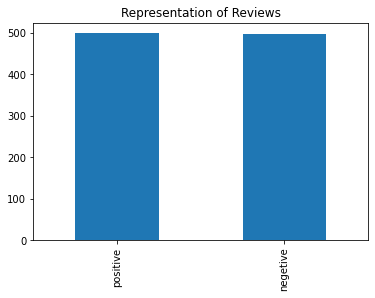

In [9]:
import matplotlib.pyplot as plt
x.plot(kind = "bar")
plt.title("Representation of Reviews")
plt.show()

In [10]:
a = df["Review"].values
b = df["Liked"].values

In [11]:
a.shape

(996,)

In [12]:
b.shape

(996,)

In [13]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,random_state = 0)

In [14]:
a_train.shape

(747,)

In [15]:
a_test.shape

(249,)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = "english")

In [17]:
a_train_vec = vec.fit_transform(a_train)
a_test_vec = vec.transform(a_test) 

In [18]:
a_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# Method 1
from sklearn.svm import SVC
model = SVC()
model.fit(a_train_vec,b_train)

SVC()

In [20]:
b_pred = model.predict(a_test_vec)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(b_pred,b_test)

0.7269076305220884

In [22]:
# Method 2
# using pipeline
# svc and count vectorizer
from sklearn.pipeline import make_pipeline
mode = make_pipeline(CountVectorizer(),SVC())
mode.fit(a_train,b_train)
b_pred2 = mode.predict(a_test)

In [23]:
accuracy_score(b_pred2,b_test)

0.8152610441767069

In [24]:
# Using naive bayes method
# Method 3
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(a_train_vec,b_train)

MultinomialNB()

In [25]:
b_pred3 = model3.predict(a_test_vec)

In [26]:
accuracy_score(b_pred3,b_test)

0.7469879518072289

In [27]:
# Using pipeline 
# CountVectorizer + Naive Bayes
# Method 4
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(a_train,b_train)
b_pred4 = model4.predict(a_test)

In [28]:
accuracy_score(b_pred4,b_test)

0.7791164658634538

In [29]:
# accuracy score - 0.7269076305220884 (SVC)
# accuracy score - 0.8152610441767069 (SVC pipeline)
# accuracy score - 0.7469879518072289 (MultinomialNB)
# accuracy score - 0.7791164658634538 (MultinomialNB pipeline)

In [30]:
!pip install joblib

In [31]:
import joblib
joblib.dump(model4,"Review_Classifier")

['Review_Classifier']

In [32]:
reload_model = joblib.load("Review_Classifier")

In [33]:
reload_model.predict(["Hello"])

array([0], dtype=int64)

In [34]:
reload_model.predict(["free for you"])

array([1], dtype=int64)

In [35]:
%%writefile application.py
import streamlit as st
import joblib
st.title("Review Detector")
reload_model = joblib.load("Review_Classifier")

ip = st.text_input("Enter your Review : ")
op = reload_model.predict([ip])

if st.button("Detect"):
  st.title(op[0])

Writing application.py


In [36]:
!streamlit run application.py & npx localtunnel --port 8501

^C
